In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import cv2
import numpy as np
import glob
import os
from random import shuffle

In [2]:
from tensorflow import keras

In [3]:
import tensorflow as tf
print(tf.test.gpu_device_name())

In [4]:
X_train=[]
X_test=[]
Y_test=[]
Y_train=[]
dataTr=[]
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/entrenamiento/Melanoma_escalado','*.jpg')):
    dataTr.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/entrenamiento/Carcinoma_escalado','*.jpg')):
    dataTr.append([0,cv2.imread(filename)])

In [5]:
dataTe=[]
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/prueba/melanoma_escalado','*.jpg')):
    dataTe.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/prueba/carcinoma_escalado','*.jpg')):
    dataTe.append([0,cv2.imread(filename)])

In [6]:
def particion(datos):
    imagenes=[]
    etiquetas=[]
    for i,j in datos:
        imagenes.append(j)
        etiquetas.append(i)
    imagenes=np.array(imagenes)
    etiquetas=np.array(etiquetas)
    return (imagenes,etiquetas)

In [7]:
shuffle(dataTr)
print("en total tenemos: "+str(len(dataTr))+ " imagenes dentro de la carpeta train")
shuffle(dataTe)
print("en total tenemos: "+str(len(dataTe))+ " imagenes dentro de la carpeta test")

en total tenemos: 12279 imagenes dentro de la carpeta train
en total tenemos: 5261 imagenes dentro de la carpeta test


In [8]:
porcion1=dataTr[0:12000]
porcion2=dataTe[0:5000]
print("para entrenamiento tendremos: "+str(len(porcion1))+ " imagenes de la carpeta de train")
print("para prueba tendremos: "+str(len(porcion2))+ " imagenes de la carpeta de test")

para entrenamiento tendremos: 12000 imagenes de la carpeta de train
para prueba tendremos: 5000 imagenes de la carpeta de test


In [9]:
x_e,y_e=particion(porcion1)
x_p,y_p=particion(porcion2)

In [10]:
def validacion(x_e,y_e,x_p,y_p,modelo1,epocas):
    entre=modelo1.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
    a=modelo1.evaluate(x_p,y_p)
    return a[1]

In [11]:
def evaluacion(modelo1,porcentaje,nombre,v1,v2):
    prediccion=0
    epocas=1
    while(True):
        if prediccion < porcentaje:
            prediccion=(validacion(x_e,y_e,x_p,y_p,modelo1,1))*100
            epocas +=1
            v1.append(epocas-1)
            v2.append(prediccion)
        else:
            print("==> Para el metodo "+nombre+" se utilizo: "+str(epocas-1)+" epocas para llegar a mas del "+str(porcentaje)+"% de acertividad")
            break 

In [13]:
modelo=Sequential()
modelo.add(Convolution2D(2,(3,3),input_shape=(224,224,3),activation='relu'))
modelo.add(Convolution2D(4,(3,3),activation='relu'))
modelo.add(Convolution2D(8,(3,3),activation='relu'))
modelo.add(MaxPooling2D(pool_size=((2,2))))
modelo.add(Convolution2D(16,(3,3),activation='relu'))
modelo.add(Convolution2D(32,(3,3),activation='relu'))
modelo.add(MaxPooling2D(pool_size=((2,2))))
modelo.add(Flatten())
modelo.add(Dense(128,activation='relu'))
modelo.add(Dense(128,activation='relu'))
modelo.add(Dense(128,activation='relu'))
modelo.add(Dense(1,activation='sigmoid'))
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 2)       56        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 4)       76        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 218, 218, 8)       296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 109, 8)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 107, 107, 16)      1168      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 105, 105, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 52, 52, 32)       

In [15]:
modelo_adam = keras.optimizers.Adam(learning_rate=0.0008)
modelo.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
v_eA=[]
v_aA=[]
evaluacion(modelo,80,"ADAM",v_eA,v_aA)

ERROR! Session/line number was not unique in database. History logging moved to new session 1131
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 12s 2ms/sample - loss: 1.5739 - acc: 0.7750
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 12s 2ms/sample - loss: 1.5136 - acc: 0.7846
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 12s 2ms/sample - loss: 1.3646 - acc: 0.7744
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 12s 2ms/sample - loss: 1.9583 - acc: 0.7996
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 12s 2ms/sample - loss: 1.0659 - acc: 0.7780
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 11s 2ms/sample - loss: 1.6027 - acc: 0.7780
Train on 12000 samples, validate on 5000 samples
5000/5000 [===============

In [19]:
entre=modelo.fit(x_e,y_e,batch_size=32,epochs=1,validation_data=(x_p,y_p))

Train on 12000 samples, validate on 5000 samples
12000/12000 [==============================] - 161s 13ms/sample - loss: 0.0102 - acc: 0.9973 - val_loss: 2.3184 - val_acc: 0.7556


In [20]:
entre=modelo.fit(x_e,y_e,batch_size=32,epochs=1,validation_data=(x_p,y_p))

Train on 12000 samples, validate on 5000 samples
12000/12000 [==============================] - 160s 13ms/sample - loss: 0.0109 - acc: 0.9967 - val_loss: 1.9524 - val_acc: 0.7788


In [16]:
modelo.save("D:/UMSA/Documentos/CNN cancer de piel/MODELOS/17000_5_3/modelo")

In [17]:
modelo.save_weights("D:/UMSA/Documentos/CNN cancer de piel/PESOS/17000_5_3/modelo_pesos")

In [18]:
count=1
print("# de EPOCAS     Valor del Accuracy")
print("----------------------------------")
for i in v_aA:
    print("epoca ",count," => ",i)
    count +=1

# de EPOCAS     Valor del Accuracy
----------------------------------
epoca  1  =>  77.49999761581421
epoca  2  =>  78.4600019454956
epoca  3  =>  77.4399995803833
epoca  4  =>  79.96000051498413
epoca  5  =>  77.7999997138977
epoca  6  =>  77.7999997138977
epoca  7  =>  78.60000133514404
epoca  8  =>  78.96000146865845
epoca  9  =>  78.14000248908997
epoca  10  =>  79.339998960495
epoca  11  =>  78.4600019454956
epoca  12  =>  79.36000227928162
epoca  13  =>  79.22000288963318
epoca  14  =>  79.19999957084656
epoca  15  =>  78.53999733924866
epoca  16  =>  78.71999740600586
epoca  17  =>  80.0000011920929


In [21]:
%matplotlib inline
import matplotlib.pyplot as mp

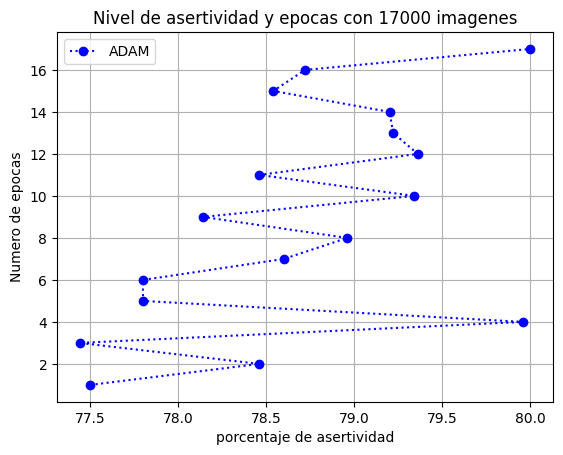

In [22]:
mp.plot(v_aA,v_eA, marker='o', linestyle=':', color='b', label = "ADAM")

#mp.xticks(np.arange(70,100,2))
#mp.yticks(np.arange(0,4,1))
mp.xlabel("porcentaje de asertividad")
mp.ylabel("Numero de epocas")
mp.legend(loc="upper left")
mp.title("Nivel de asertividad y epocas con 17000 imagenes")
mp.grid(True)
mp.show()

In [23]:
lr_probs = modelo.predict_proba(x_p)
lr_probs = lr_probs[:, 0]
ns_probs = [0 for _ in range(len(y_p))]


In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [25]:
# Calculamos el AUC
ns_auc = roc_auc_score(y_p, ns_probs)
lr_auc = roc_auc_score(y_p, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Red Neuronal: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Red Neuronal: ROC AUC=0.814


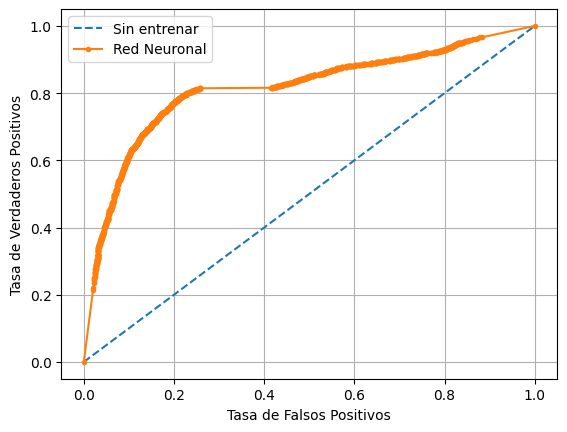

In [26]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_p, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_p, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Red Neuronal')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
mp.grid(True)
pyplot.show()

In [27]:
lr_probs = modelo.predict_proba(x_p)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 0]

In [28]:
yhat = modelo.predict(x_p)

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [30]:
lr_precision, lr_recall, _ = precision_recall_curve(y_p, lr_probs)
lr_auc =  auc(lr_recall, lr_precision)
no_skill = len(y_p[y_p==1]) / len(y_p)


Redes neuronales: auc=0.829


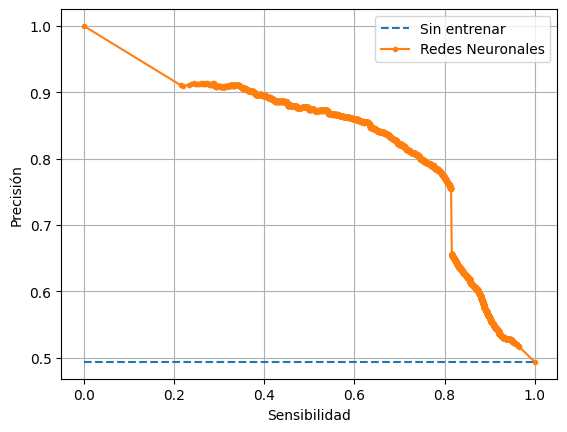

In [31]:
print('Redes neuronales: auc=%.3f' % (lr_auc))
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Redes Neuronales')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
mp.grid(True)
pyplot.show()

In [32]:
modelo.weights

[<tf.Variable 'conv2d_5/kernel:0' shape=(3, 3, 3, 2) dtype=float32>,
 <tf.Variable 'conv2d_5/bias:0' shape=(2,) dtype=float32>,
 <tf.Variable 'conv2d_6/kernel:0' shape=(3, 3, 2, 4) dtype=float32>,
 <tf.Variable 'conv2d_6/bias:0' shape=(4,) dtype=float32>,
 <tf.Variable 'conv2d_7/kernel:0' shape=(3, 3, 4, 8) dtype=float32>,
 <tf.Variable 'conv2d_7/bias:0' shape=(8,) dtype=float32>,
 <tf.Variable 'conv2d_8/kernel:0' shape=(3, 3, 8, 16) dtype=float32>,
 <tf.Variable 'conv2d_8/bias:0' shape=(16,) dtype=float32>,
 <tf.Variable 'conv2d_9/kernel:0' shape=(3, 3, 16, 32) dtype=float32>,
 <tf.Variable 'conv2d_9/bias:0' shape=(32,) dtype=float32>,
 <tf.Variable 'dense_4/kernel:0' shape=(86528, 128) dtype=float32>,
 <tf.Variable 'dense_4/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_5/kernel:0' shape=(128, 128) dtype=float32>,
 <tf.Variable 'dense_5/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_6/kernel:0' shape=(128, 128) dtype=float32>,
 <tf.Variable 'dense_6/bias:0' shap